In [247]:
import pandas as pd

# 6. Sales Load the csv data  via panda as Dataframe
sales_df = pd.read_csv("sales.csv")
# Analyse and view sample data
sales_df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536527,22809,SET OF 6 T-LIGHTS SANTA,6,01-12-2010 13:04,2.95,12662,Germany
1,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,01-12-2010 13:04,2.55,12662,Germany
2,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,01-12-2010 13:04,0.85,12662,Germany
3,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,01-12-2010 13:04,1.65,12662,Germany
4,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,01-12-2010 13:04,1.95,12662,Germany


In [248]:
# 6.1 Sales - missing value in each column
print(sales_df.isnull().sum().sum()) #pd.isnull(sales_df).sum() # or #
# Inference : No missing value found
sales_df.describe()
# Row wise missing value checking
print(sales_df[sales_df.isnull().any(axis=1)])
# 6.2 Datatype checks
sales_df.info()

0
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9495 entries, 0 to 9494
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    9495 non-null   object 
 1   StockCode    9495 non-null   object 
 2   Description  9495 non-null   object 
 3   Quantity     9495 non-null   int64  
 4   InvoiceDate  9495 non-null   object 
 5   UnitPrice    9495 non-null   float64
 6   CustomerID   9495 non-null   int64  
 7   Country      9495 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 593.6+ KB


In [249]:
# 6.3 Sales Identify and show duplicate rows

print("\n Sales - Duplicate Recordss : ", sales_df.duplicated().sum())
# Inference : there are 15 dupilcates rows
# To show duplicates
print("\n Duplicate Recordss : ")
print(sales_df[sales_df.duplicated()])
print("\n Sales : Number of Duplicates:", sales_df.duplicated().sum())
# Inference : there are 15 dupilcates rows
sales_df.drop_duplicates(inplace=True)
#verify duplicates removal
sales_df.duplicated().sum() 
sales_df.reset_index(inplace=True)
sales_df.info() # total cnt of row post duplicate removal


 Sales - Duplicate Recordss :  15

 Duplicate Recordss : 
     InvoiceNo StockCode                          Description  Quantity  \
292     538174     22326  ROUND SNACK BOXES SET OF4 WOODLAND         12   
1132    542106     20676                   RED RETROSPOT BOWL        24   
3232    553731     23208        LUNCH BAG VINTAGE LEAF DESIGN        10   
3626    555162     22704                     WRAP RED APPLES         25   
3744    555383     21828               EIGHT PIECE SNAKE  SET         2   
3748    555383     22668                    PINK BABY BUNTING         5   
5969    565430     22375    AIRLINE BAG VINTAGE JET SET BROWN         1   
5984    565430     22725       ALARM CLOCK BAKELIKE CHOCOLATE         2   
7023    570007     20676                   RED RETROSPOT BOWL         8   
8280    575886     21354                 TOAST ITS - BEST MUM         1   
8281    575886     21355              TOAST ITS - I LOVE YOU          1   
8306    575886     22059        CERAMIC S

In [250]:
# 6. Stocks Load the csv data  via panda as Dataframe

stocks_df = pd.read_csv("StockDetails.csv")
stocks_df.head()
stocks_df.describe()
# Total stock rows = 1703
len(stocks_df)
print(stocks_df['StockCode'].nunique())

1671


In [251]:
# Stocks 6.1 missing value in each column

# Inference : No missing value found
print("\nStock Details - Number of Duplicates:", stocks_df.duplicated().sum())
# Row wise missing value checking
print(stocks_df[stocks_df.isnull().any(axis=1)])
# 6.2 Datatype checks
print("\n checking Data Type : ")
stocks_df.info()
# 6.3 Stocks - Identify duplicate rows

stocks_df.duplicated().sum() 
# Inference : there are no dupilcates rows



Stock Details - Number of Duplicates: 0
Empty DataFrame
Columns: [StockCode, Description]
Index: []

 checking Data Type : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   StockCode    1703 non-null   object
 1   Description  1703 non-null   object
dtypes: object(2)
memory usage: 26.7+ KB


np.int64(0)

In [252]:
# 7. Convert invoice date into datetime, extract date, month, hour of transaction
sales_df['InvoiceDate'] = pd.to_datetime(sales_df['InvoiceDate'], format='%d-%m-%Y %H:%M')
sales_df.head()
#print(sales_df['InvoiceDate'].dt.month) # to just show without new columns
sales_df['DayOfInvoice'] =sales_df['InvoiceDate'].dt.date
sales_df['MonthOfInvoice'] =sales_df['InvoiceDate'].dt.month
sales_df['TransactionHour'] =sales_df['InvoiceDate'].dt.hour
# Verify Month, Hour, date
sales_df[['DayOfInvoice', 'MonthOfInvoice','TransactionHour']].head()


,DayOfInvoice,MonthOfInvoice,TransactionHour
0,2010-12-01,12,13
1,2010-12-01,12,13
2,2010-12-01,12,13
3,2010-12-01,12,13
4,2010-12-01,12,13


In [253]:
# 8. Add a new column TotalPrice = Quantity * UnitPrice.  
'''  Before finding  total price, pre data analysis found negative quantity.
     I also infer -ve quanity invoiceNo starts with 'C' which I assume as cancellations/return/refunds with -ve quanity records
     Assumption : I cleanup the -ve quantity but just keeping track of cancel invoices seperately
     cancellations = sales_df[sales_df['InvoiceNo'].str.startswith('C', na=False)] # also it is negative_sales sales 

     #negative_sales['InvoiceNo'].str.contains("C").head()
     cancellations = sales_df[sales_df['InvoiceNo'].str.startswith('C', na=False)]
     print(len(cancellations))
'''
all_sales_df =sales_df.copy() # This is overall inventory data with refund/cancels + actual sales later Q19. It is useful to calculate % of stocks sold
negative_sales = sales_df[sales_df['Quantity'] < 0]
valid_sales = sales_df[sales_df['Quantity'] > 0]
print(len(negative_sales))

453


In [254]:
#8.1 cleanup sales data
'''# Fow now lets assume to take +ve quanities for as actual sales for revenues, considering -ve quantities are cancellation & refunds
     Eliminate negative records
'''
sales_df.shape
sales_df['Quantity'].unique()
# filter -ve quantity , making sales_df = cleaned sales data
sales_df = sales_df[sales_df['Quantity']>0]
# inference = 453 -ve values, 
sales_df.reset_index(inplace=True)
len(sales_df)
# verifying -ve quantity cleanup
sales_df['Quantity'].unique()

# 8.1 Calculate Revenue/TotalPrice as new column
# Removed -ve quantity, calculating Revenue/TotalPrice with +ve quantity as actual sales
sales_df['TotalPrice'] = sales_df['UnitPrice']*sales_df['Quantity']
# -ve value : 453, total : value : 9480 total +ve: 9027
sales_df[['UnitPrice','Quantity', 'TotalPrice']].tail()

,UnitPrice,Quantity,TotalPrice
9022,1.25,12,15.00
9023,0.85,12,10.20
9024,0.85,12,10.20
9025,2.08,12,24.96
9026,1.65,10,16.50


In [255]:
# 9. Identify the top 3 bestselling items by quantity sold.
# top 3 selling single item
top_3_items = sales_df['Quantity'].sort_values(ascending=False).head(3)
print("\nTop 3 Bestselling individual item by Quantity Sold:")
print(top_3_items)
# we can get all records of top 3 selling item
# if top 3 selling stock as an single stock item, stocks  have to be grouped
top_3_stock = sales_df.groupby(['StockCode', 'Description'])['Quantity'].sum().sort_values(ascending=False).head(3)
print("\nTop 3 Bestselling individual Stock by Quantity Sold:")
print(top_3_stock)



Top 3 Bestselling individual item by Quantity Sold:
2917    600
6677    432
3813    300
Name: Quantity, dtype: int64

Top 3 Bestselling individual Stock by Quantity Sold:
StockCode  Description                        
22326      ROUND SNACK BOXES SET OF4 WOODLAND     1221
15036      ASSORTED COLOURS SILK FAN              1164
POST       POSTAGE                                1114
Name: Quantity, dtype: int64


In [256]:
# 10.1  How many unique customers made purchases
unique_customers = sales_df['CustomerID'].nunique()
print("\n Number of Unique Customers:", unique_customers)
#  There are 94 unique customers
# verify with unique on customer
# sales_df['CustomerID'].unique()
# 10.2  average quantity per invoice.  
avg_quantity = round(sales_df.groupby(['InvoiceNo'])['Quantity'].sum().mean(), 2)
print("\n Average Quantity per Invoice:", round(avg_quantity, 2))

# With including cancelled orders : Average Quantity per Invoice: 9.21


 Number of Unique Customers: 94

 Average Quantity per Invoice: 260.74


C. Visualization

  StockCode                          Description  Quantity
0     22326  ROUND SNACK BOXES SET OF4 WOODLAND       1221
1     15036            ASSORTED COLOURS SILK FAN      1164
2      POST                              POSTAGE      1114
3     20719               WOODLAND CHARLOTTE BAG      1020
4     21212      PACK OF 72 RETROSPOT CAKE CASES      1002
5     22585            PACK OF 6 BIRDY GIFT TAGS       936
6     22629                  SPACEBOY LUNCH BOX        876
7     22554     PLASTERS IN TIN WOODLAND ANIMALS       856
8     22961               JAM MAKING SET PRINTED       816
9     22423             REGENCY CAKESTAND 3 TIER       809


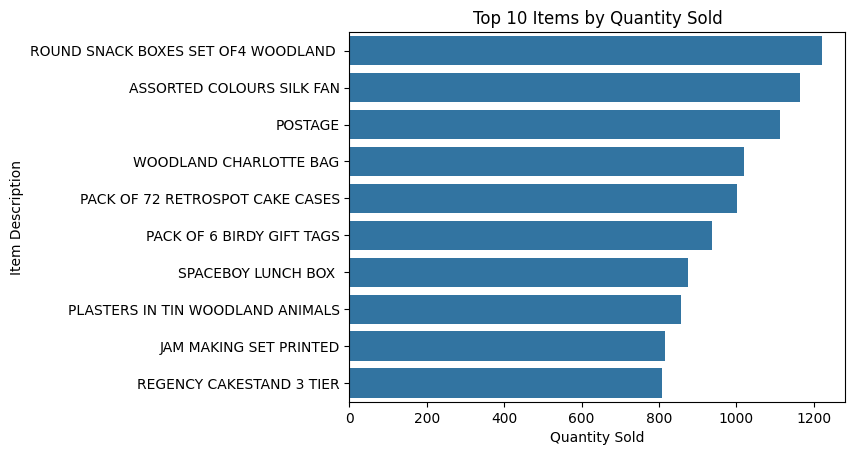

In [257]:
# 11. Plot a bar chart of top 10 items by quantity sold. 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

top_10_stock = valid_sales.groupby(['StockCode', 'Description'])['Quantity'].sum().sort_values(ascending=False).head(10).reset_index()
print(top_10_stock)
#sales_df = valid_sales.copy()
sns.barplot(data=top_10_stock, x= 'Quantity', y='Description')
plt.title('Top 10 Items by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Item Description')
plt.show()

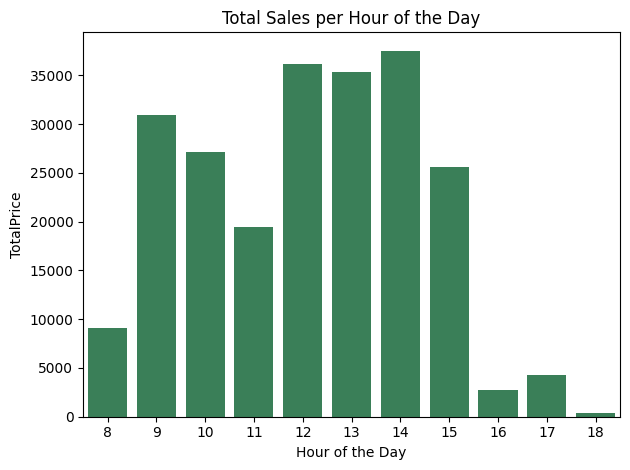

Total Sales per Hour:
    TransactionHour  TotalPrice
0                 8     9070.25
1                 9    30936.20
2                10    27097.47
3                11    19485.58
4                12    36178.77
5                13    35320.35
6                14    37527.59
7                15    25642.97
8                16     2729.20
9                17     4275.92
10               18      414.10


In [258]:
# 12. Plot total sales per hour of the day to understand peak shopping hours.  
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sales_df.head()
# Group by Hour and sum TotalPrice
sales_per_hour = sales_df.groupby('TransactionHour')['TotalPrice'].sum().reset_index()
sales_per_hour.head()

sns.barplot(data=sales_per_hour, x=sales_per_hour['TransactionHour'], y=sales_per_hour['TotalPrice'], color='seagreen')
plt.xlabel('Hour of the Day')
plt.title('Total Sales per Hour of the Day')
plt.tight_layout()
plt.show()

# Display sales per hour
print("Total Sales per Hour:")
print(sales_per_hour)

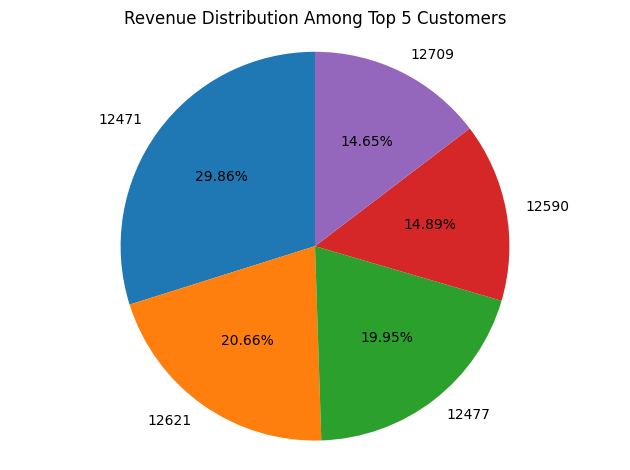

In [259]:
# 13. Create a pie chart showing revenue distribution among top 5 customers.  
sales_df.head()
customer_revenue  = sales_df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).reset_index()
top_5_customers =customer_revenue.head(5)
labels = top_5_customers['CustomerID'].astype(str)
sizes= top_5_customers['TotalPrice']
plt.title('Revenue Distribution Among Top 5 Customers')
plt.pie(sizes,  labels=labels,  autopct='%1.2f%%', startangle=90)
plt.axis('equal')
plt.tight_layout()

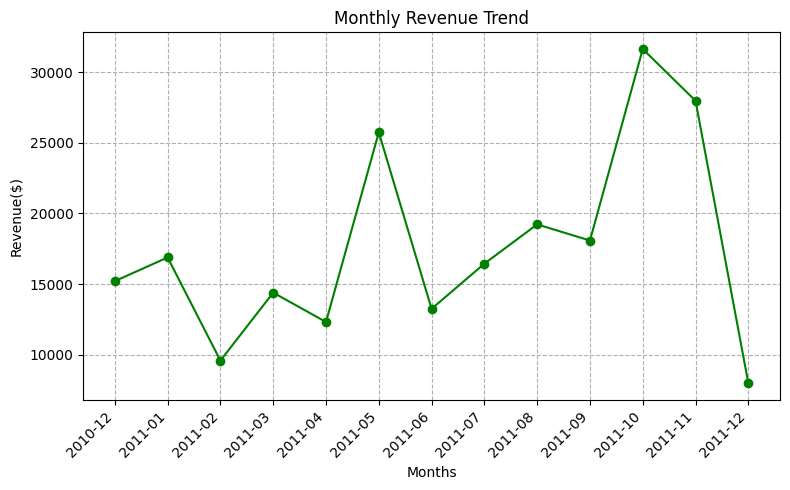

In [260]:
# 14. Visualize the monthly revenue trend using a line chart.  
sales_df.head()
sales_df['YearMonth'] = sales_df['InvoiceDate'].dt.to_period('M').astype(str)

#sales_df['YearMonth'].unique()
sales_monthly_revenue = sales_df.groupby('YearMonth')['TotalPrice'].sum().reset_index()
# Plot line chart
plt.figure(figsize=(8, 5))
plt.plot(sales_monthly_revenue['YearMonth'].astype(str), sales_monthly_revenue['TotalPrice'], marker='o', color='green')
plt.xlabel('Months')
plt.ylabel('Revenue($)')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--')
plt.tight_layout()

In [261]:
# 15. Create a stacked bar chart of top 5 invoices by revenue, showing contribution from each item.  
# Get top 5 invoices by total revenue
top_5_invoices_by_revenue_df = sales_df.groupby('InvoiceNo')['TotalPrice'].sum().sort_values(ascending=False).head(5)
top_invoices_list = top_5_invoices_by_revenue_df.index.tolist()
top_invoices_list
print(top_invoices_list)
top_invoices_df = sales_df[sales_df['InvoiceNo'].isin(top_invoices_list)]
top_invoices_df['InvoiceNo'].unique()
pivot_df = top_invoices_df.pivot_table(index='InvoiceNo', columns='Description', values='TotalPrice', aggfunc='sum', fill_value=0)
# Step 9: Plot stacked bar chart

import plotly.express as px
fig = px.bar(top_invoices_df, x='InvoiceNo', y='TotalPrice', color='Description', title='Top 5 Invoices by Revenue (Stacked by Item)',
                width=1000,  # Adjust overall figure width
                height=600 ,  # Adjust overall figure height
              labels={
        'InvoiceNo': 'Invoice Number',
        'TotalPrice': 'Revenue ($)',
        'Description': 'Product'},
        
    )
# Customize bar width (default is 0.8, reduce for narrower bars)
fig.update_traces(width=0.6)  # Values between 0 and 1

fig.show()

['552978', '564856', '543737', '581179', '550137']


Task-D - Business Insight Problems & Solutions

In [262]:
# Business Insight Problems & Solutions
# 16. Identify which product generates the highest total revenue. 
positive_sales_df = sales_df.copy()
positive_sales_df.head()
positive_sales_df.shape
positive_sales_df['Quantity'].unique()
top_product = positive_sales_df.groupby(["StockCode","Description"])['TotalPrice'].sum().sort_values(ascending=False).head(1)

print("\n Product that enerates the highest total revenue:")
print(top_product)


 Product that enerates the highest total revenue:
StockCode  Description
POST       POSTAGE        21001.0
Name: TotalPrice, dtype: float64


In [263]:
# 17. Determine average order value per invoice.  

positive_sales_df.head()
avg_order_per_invoice = positive_sales_df.groupby('InvoiceNo')['TotalPrice'].sum().mean()
# Display results
print("Product with Highest Total Revenue:")
print(avg_order_per_invoice)
print("\nAverage Order Value per Invoice: ${:.2f}".format(avg_order_per_invoice))

Product with Highest Total Revenue:
500.39037199124726

Average Order Value per Invoice: $500.39


In [264]:
# 18. Find the customer with the highest number of transactions.  
ransaction_customers  = positive_sales_df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)
highest_transaction_customers = ransaction_customers.head(1).reset_index()
# Display result
print("Customer with Highest Number of Transactions:")
print(highest_transaction_customers)

Customer with Highest Number of Transactions:
   CustomerID  InvoiceNo
0       12569         32



#19. Evaluate the percentage of stock items sold vs. total in inventory.  
Actually Inventory details is not explicitly mentioned, so difficult to proceed however we can do assumptions, progress with approaches.
Approach - A =  simply considering unique stocks vs all item sold
Approach - B =  every stock sold vs that stock's total ( sold + cancel/returns)
# Since inventory data is not given or explicitly, will make assumption TotalInventory = sold item (+ve quantity) + return/refund/cancelled items
% of Percentage of Stock Items Sold = 'QuantitySold'/TotalInventory * 100


In [265]:
'''
#19. Evaluate the percentage of stock items sold vs. total in inventory.  
Actually Inventory details is not explicitly mentioned, so difficult to proceed however we can do assumptions, progress with approaches.
Approach - A =  simply considering unique stocks vs all item sold
Approach - B =  every stock sold vs that stock's total ( sold + cancel/returns)
# Since inventory data is not given or explicitly, will make assumption TotalInventory = sold item (+ve quantity) + return/refund/cancelled items
% of Percentage of Stock Items Sold = 'QuantitySold'/TotalInventory * 100

'''
#19. Evaluate the percentage of stock items sold vs. total in inventory.  

# A. simple Calculation a particular stock item sold vs total stock items
positive_sales_df.head()
# Step 2: Get total unique items in inventory
#total_items = all_sales_df['StockCode'].nunique()
total_items = stocks_df['StockCode'].nunique() # as per clarification will assume inventory as unique stocks from stock details
print (total_items)
sold_items = positive_sales_df['StockCode'].nunique()

print (sold_items)
# Step 4: Calculating the percentage sold
percent_sold = (sold_items / total_items) * 100
# Step 5: Displaying the result
print("Approach A. Percentage of Stock Items Sold vs. Total Inventory: \n")
print(f"Total unique stock items: {total_items}")
print(f"Stock items sold: {sold_items}")
print(f"Percentage of stock items sold: {percent_sold:.2f}%")

# B. More refined Calculation stock item sold(+ve quanitity) vs total stock items(sold + refund/cancel = -ve quanity on a stock, then)
# B. Stock/product wise with its respective total
negative_sales = all_sales_df[all_sales_df['Quantity'] < 0]
valid_sales = positive_sales_df.copy()
# Calculate quantities sold per StockCode
sold_quantities = valid_sales.groupby(['StockCode', 'Description'])['Quantity'].sum().sort_values(ascending=False).reset_index(name='QuantitySold')
return_quantities = negative_sales.groupby(['StockCode', 'Description'])['Quantity'].sum().abs().sort_values(ascending=False).reset_index(name='QuantityReturned')
# total inventory = sold + cancelled/return
inventory_df = sold_quantities.merge(return_quantities, on=['StockCode', 'Description'], how='outer').fillna(0)

# Calculate total inventory (sold + returned)
inventory_df['TotalInventory'] = inventory_df['QuantitySold'] + inventory_df['QuantityReturned']

# Calculate percentage sold
inventory_df['PercentageSold'] = (inventory_df['QuantitySold'] / inventory_df['TotalInventory'] * 100).round(2)

# Handle cases where TotalInventory is 0 (no sales or returns)
inventory_df['PercentageSold'] = inventory_df['PercentageSold'].fillna(0)

# Sort by PercentageSold or QuantitySold for clarity
inventory_df = inventory_df.sort_values(by='QuantitySold', ascending=False)
inventory_df[['StockCode','Description','QuantitySold', 'QuantityReturned','TotalInventory','PercentageSold'  ]].sample(50)
# Display results
print("\n\nApproach B. Percentage of Stock Items Sold vs. Total Inventory: \n")
print(f"Total Items Sold: {int(inventory_df['QuantitySold'].sum())}")
print(f"Total Inventory: {int(inventory_df['TotalInventory'].sum())}")
print(f"Overall Percentage Sold: {inventory_df['QuantitySold'].sum() / inventory_df['TotalInventory'].sum() * 100:.2f}%")
inventory_df.sample(20)

1671
1665
Approach A. Percentage of Stock Items Sold vs. Total Inventory: 

Total unique stock items: 1671
Stock items sold: 1665
Percentage of stock items sold: 99.64%


Approach B. Percentage of Stock Items Sold vs. Total Inventory: 

Total Items Sold: 119156
Total Inventory: 120971
Overall Percentage Sold: 98.50%


,StockCode,Description,QuantitySold,QuantityReturned,TotalInventory,PercentageSold
1221,23241,TREASURE TIN GYMKHANA DESIGN,42.0,3.0,45.0,93.33
360,21843,RED RETROSPOT CAKE STAND,35.0,5.0,40.0,87.50
143,21125,SET 6 FOOTBALL CELEBRATION CANDLES,75.0,0.0,75.0,100.00
1014,22944,CHRISTMAS METAL POSTCARD WITH BELLS,6.0,0.0,6.0,100.00
1245,23275,SET OF 3 HANGING OWLS OLLIE BEAK,36.0,0.0,36.0,100.00
839,22664,TOY TIDY DOLLY GIRL DESIGN,1.0,0.0,1.0,100.00
860,22705,WRAP GREEN PEARS,125.0,0.0,125.0,100.00
899,22747,POPPY'S PLAYHOUSE BATHROOM,84.0,0.0,84.0,100.00
1498,72351B,SET/6 PINK BUTTERFLY T-LIGHTS,24.0,0.0,24.0,100.00
1337,23425,STORAGE TIN HOME SWEET HOME,12.0,3.0,15.0,80.00


In [266]:
# 20. Check how many products in the sales data do not have a matching entry in the stockDetails file.  

stock_df = pd.read_csv('StockDetails.csv')
#stock_df.info()
#stock_df.isnull().sum()
#stock_df.sample(10)

sales_stocks_list = positive_sales_df['StockCode'].unique()
print(sales_stocks_list.size)
# Get unique StockCode values from stockDetails
stock_details_stock_list = stock_df['StockCode'].unique()
print(stock_details_stock_list.size)

# Find StockCode values in sales data not in stockDetails
unmatched_stock_codes = [code for code in sales_stocks_list if code not in stock_details_stock_list]
unmatched_stock_codes
print(unmatched_stock_codes)
# Inerence : unmatched_stock_codes = 0
# Get details of unmatched products
unmatched_products = positive_sales_df[positive_sales_df['StockCode'].isin(unmatched_stock_codes)][['StockCode', 'Description']].drop_duplicates()

# Count unmatched products
unmatched_count = len(unmatched_stock_codes)
# Display results
print("\nA. Approach- Sales codes not in stock details" )
print(f"Number of products in sales data without a matching entry in stockDetails: {unmatched_count}")
print("\nhow many Unmatched Products:")
print(unmatched_count)

# B. Sales not match entries of stock -also there are stock details but no sales done on the stock yet
# Find codes in sales but not in stock
unmatched_codes = set(stock_details_stock_list) - set(sales_stocks_list)
num_unmatched = len(unmatched_codes)
print("\nB. Approach- Stock_details codes not yet made sales till now -Unpurchased Stocks \n " )
print(f"Number of Stock in stocks details with no stock entry in sales: {num_unmatched}")
print("Unmatched StockCodes:", unmatched_codes)
print("\nhow many Unmatched Products:")
print(unmatched_count)


1665
1671
[]

A. Approach- Sales codes not in stock details
Number of products in sales data without a matching entry in stockDetails: 0

how many Unmatched Products:
0

B. Approach- Stock_details codes not yet made sales till now -Unpurchased Stocks 
 
Number of Stock in stocks details with no stock entry in sales: 6
Unmatched StockCodes: {'22405', '22767', '20703', '20957', '22444', '85232B'}

how many Unmatched Products:
0
